# CASE STUDY

#### UNDERSTANDING DATA

In [1]:
# IMPORT THE REQUIRED MODULES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import data.
telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom_data.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [4]:
telecom_data.shape

(99999, 226)

In [5]:
# Checking the informations regarding the dataset
telecom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [7]:
# Finding the number of null value
telecom_data.isnull().sum()/telecom_data.shape[0]*100

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [8]:
# Number of columns above 50 percent missing values
sum((telecom_data.isnull().sum()/telecom_data.shape[0]) > 0.5)

40

#### DATA ANALYSIS

In [18]:
telecom_data.shape

(99999, 226)

In [19]:
#check for any duplicate data
telecom_data = telecom_data.drop_duplicates()
telecom_data.shape

(99999, 226)

In [21]:
# As mobile number is a unique number we can look at the value count to know wheather there is duplicates or not

telecom_data['mobile_number'].value_counts().sum()
# no duplicates

99999

In [22]:
telecom_data.shape

(99999, 226)

In [24]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in telecom_data.columns:
    if telecom_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass
print(unique_1_col)
telecom_data.drop(unique_1_col, axis=1, inplace = True)


['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [28]:
#selecting all the columns with datetime format and converting them
date_col= telecom_data.select_dtypes(include=['object'])
print(date_col.columns)
for i in date_col.columns:
    telecom_data[i] = pd.to_datetime(telecom_data[i])


Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


#### HANDLING MISSING VALUES

In [31]:
#Handling the missing values for the attributes total_rech_data_*, max_rech_data_* and for month 6,7,8 and 9
telecom_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)
for i in range(len(telecom_data)):
    if pd.isnull((telecom_data['total_rech_data_6'][i]) and (telecom_data['max_rech_data_6'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_6'][i]):
            telecom_data['total_rech_data_6'][i]=0
            telecom_data['max_rech_data_6'][i]=0
    if pd.isnull((telecom_data['total_rech_data_7'][i]) and (telecom_data['max_rech_data_7'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_7'][i]):
            telecom_data['total_rech_data_7'][i]=0
            telecom_data['max_rech_data_7'][i]=0
    if pd.isnull((telecom_data['total_rech_data_8'][i]) and (telecom_data['max_rech_data_8'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_8'][i]):
            telecom_data['total_rech_data_8'][i]=0
            telecom_data['max_rech_data_8'][i]=0
    if pd.isnull((telecom_data['total_rech_data_9'][i]) and (telecom_data['max_rech_data_9'][i])):
        if pd.isnull(telecom_data['date_of_last_rech_data_9'][i]):
            telecom_data['total_rech_data_9'][i]=0
            telecom_data['max_rech_data_9'][i]=0


In [33]:
#The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column

telecom_data.drop(['count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

In [35]:
#The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset
telecom_data.drop(['arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)

In [36]:
#The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%
telecom_data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)

In [37]:
telecom_data.shape


(99999, 186)

In [38]:
for i in range(len(telecom_data)):
    if (pd.isnull(telecom_data['av_rech_amt_data_6'][i]) and (telecom_data['total_rech_data_6'][i]==0)):
        telecom_data['av_rech_amt_data_6'][i] = 0
    if (pd.isnull(telecom_data['av_rech_amt_data_7'][i]) and (telecom_data['total_rech_data_7'][i]==0)):
        telecom_data['av_rech_amt_data_7'][i] = 0
    if (pd.isnull(telecom_data['av_rech_amt_data_8'][i]) and (telecom_data['total_rech_data_8'][i]==0)):
        telecom_data['av_rech_amt_data_8'][i] = 0
    if (pd.isnull(telecom_data['av_rech_amt_data_9'][i]) and (telecom_data['total_rech_data_9'][i]==0)):
        telecom_data['av_rech_amt_data_9'][i] = 0

In [39]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)


In [40]:
# Dropping the columns related to datetime dtype from the dataset
telecom_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)


#### HIGH VALUE CUSTOMERS

In [45]:
# Filtering the data 
telecom_data['total_rech_amt_data_6']=telecom_data['av_rech_amt_data_6'] * telecom_data['total_rech_data_6']
telecom_data['total_rech_amt_data_7']=telecom_data['av_rech_amt_data_7'] * telecom_data['total_rech_data_7']

In [46]:

telecom_data['overall_rech_amt_6'] = telecom_data['total_rech_amt_data_6'] + telecom_data['total_rech_amt_6']
telecom_data['overall_rech_amt_7'] = telecom_data['total_rech_amt_data_7'] + telecom_data['total_rech_amt_7']

In [47]:
telecom_data['avg_rech_amt_6_7'] = (telecom_data['overall_rech_amt_6'] + telecom_data['overall_rech_amt_7'])/2
cut_off = telecom_data['avg_rech_amt_6_7'].quantile(0.70)
# Filtering the data to the top 30% considered as High Value Customer
telecom_data = telecom_data[telecom_data['avg_rech_amt_6_7'] >= cut_off]

In [48]:
#Overall missing values
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9    6.34
spl_og_mou_9        6.34
loc_og_t2m_mou_9    6.34
loc_og_t2f_mou_9    6.34
loc_ic_t2t_mou_9    6.34
                    ... 
max_rech_amt_8      0.00
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
avg_rech_amt_6_7    0.00
Length: 183, dtype: float64

#### DATA PREPARATION

In [86]:
# Scaling 
from sklearn.preprocessing import MinMaxScaler
num_col = telecom_data.select_dtypes(include = ['int64','float64']).columns.tolist()
scalar = MinMaxScaler()
telecom_data[num_col]=scalar.fit_transform(telecom_data[num_col])


In [88]:
#Imputing
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=3)
telecom_data_knn = pd.DataFrame(knn.fit_transform(telecom_data[num_col]))
telecom_data_knn.columns=telecom_data[num_col].columns


In [89]:
telecom_data_knn.isnull().sum().sum()


0

In [90]:
telecom_data[num_col]=scalar.inverse_transform(telecom_data_knn)
telecom_data.head(10)


,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,315.0,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,720.0,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,604.0,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.000000,0.00,0.000000,0.00,...,1328.0,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5
38,7.000815e+09,363.987,486.558,393.909,391.709,248.99,619.960000,666.38,494.790000,88.86,...,1155.0,0.00,0.00,0.00,0.00,0.0,0.0,420.0,636.0,528.0
41,7.000721e+09,482.832,425.764,229.769,143.596,86.39,118.880000,80.44,40.060000,232.36,...,2010.0,0.00,0.00,0.00,0.00,0.0,0.0,496.0,510.0,503.0
48,7.000294e+09,1873.271,575.927,179.218,1189.744,2061.69,881.430000,156.91,1589.230000,1087.76,...,1265.0,0.00,0.00,0.00,0.00,0.0,0.0,2317.0,580.0,1448.5
53,7.002189e+09,978.077,1141.296,706.020,1076.247,135.14,119.590000,102.69,99.830000,479.31,...,697.0,0.00,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0


In [91]:
((telecom_data.isnull().sum()/telecom_data.shape[0])*100).round(2).sort_values(ascending=False)


mobile_number       0.0
isd_ic_mou_8        0.0
ic_others_6         0.0
ic_others_7         0.0
ic_others_8         0.0
                   ... 
spl_og_mou_8        0.0
spl_og_mou_9        0.0
og_others_6         0.0
og_others_7         0.0
avg_rech_amt_6_7    0.0
Length: 183, dtype: float64

In [92]:
telecom_data.isnull().sum().sum()


0

#### CHURN

In [94]:
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

In [95]:
telecom_data['churn']=0
telecom_data['churn'] = np.where(telecom_data[churn_col].sum(axis=1) == 0, 1, 0)

In [96]:
#Churn percentage
print((telecom_data['churn'].value_counts()/len(telecom_data))*100)


churn
0    91.863605
1     8.136395
Name: count, dtype: float64


In [97]:
#Churn percentage can cause class imbalance

In [98]:
# Dropping all churn columns
churn_phase_cols = [col for col in telecom_data.columns if '_9' in col]
telecom_data.drop(churn_phase_cols, axis=1, inplace=True)
telecom_data.shape

(30001, 141)

#### DATA VISUALIZATION

In [100]:
# creating a new variable 'tenure'
telecom_data['tenure'] = (telecom_data['aon']/30).round(0)
# Since we derived a new column from 'aon', we can drop it
telecom_data.drop('aon',axis=1, inplace=True)
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
telecom_data['tenure_range'] = pd.cut(telecom_data['tenure'], tn_range, labels=tn_label)
telecom_data['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

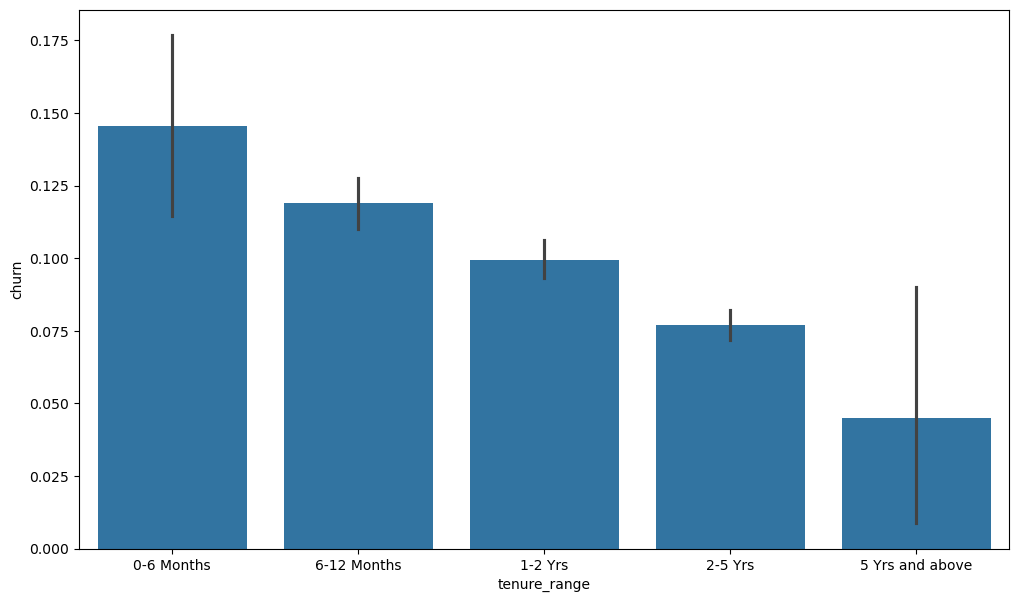

In [101]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=telecom_data)
plt.show()

In [102]:
telecom_data["avg_arpu_6_7"]= (telecom_data['arpu_6']+telecom_data['arpu_7'])/2
telecom_data['avg_arpu_6_7'].head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_6_7, dtype: float64

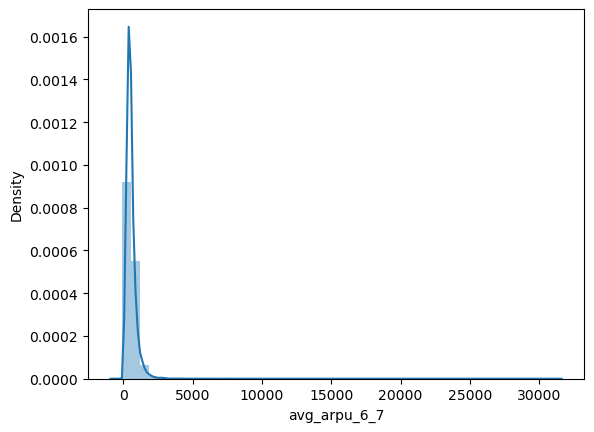

In [103]:
sns.distplot(telecom_data['avg_arpu_6_7'])
plt.show()

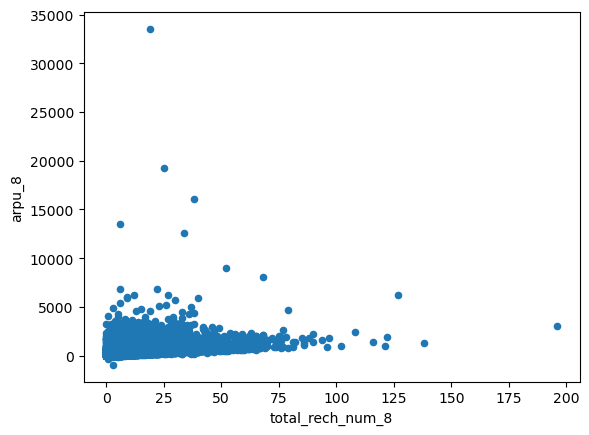

In [104]:
# total recharge and avg revenue for the 8th month
telecom_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

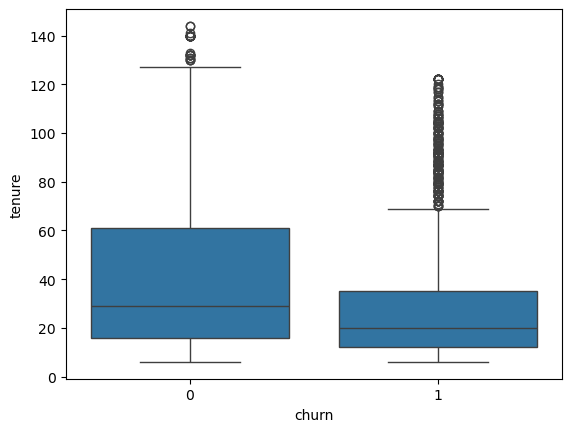

In [105]:
sns.boxplot(x = telecom_data.churn, y = telecom_data.tenure)

plt.show()

In [106]:
# Creating categories for month 8 column totalrecharge and their count
telecom_data['total_rech_data_group_8']=pd.cut(telecom_data['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
telecom_data['total_rech_num_group_8']=pd.cut(telecom_data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 total_rech_data_group_8
<=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: count, dtype: int64


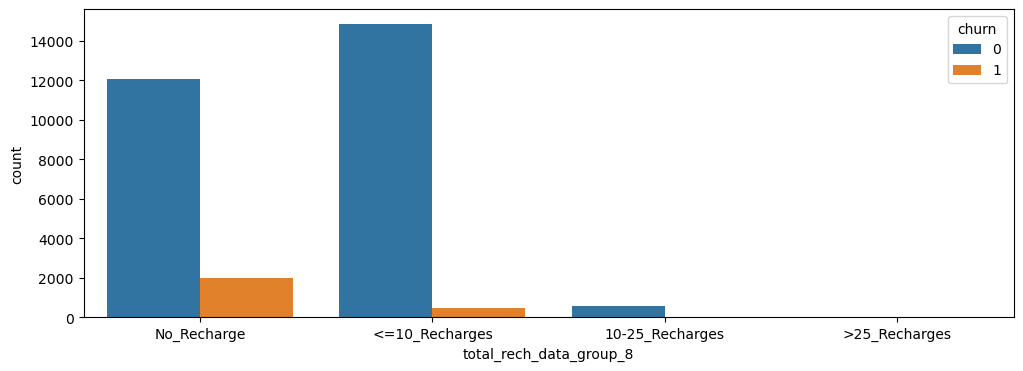

					Distribution of total_rech_num_8 variable
 total_rech_num_group_8
<=10_Recharges     19349
10-25_Recharges     8073
>25_Recharges       1996
No_Recharge          583
Name: count, dtype: int64


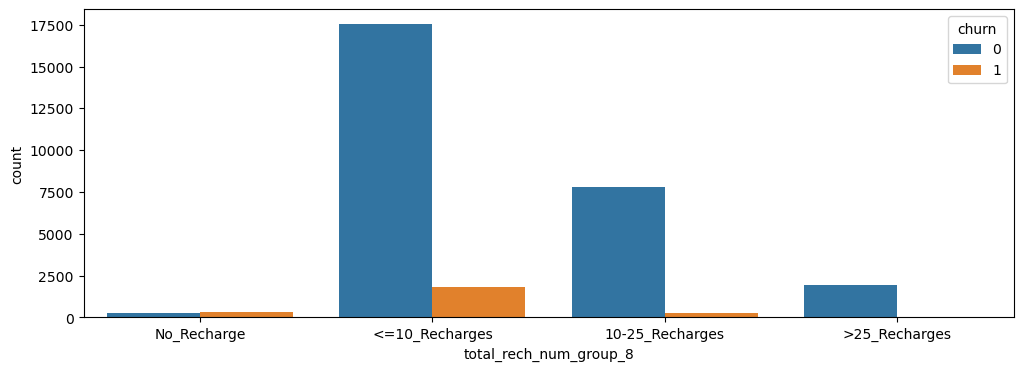

In [107]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",telecom_data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=telecom_data,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",telecom_data['total_rech_num_group_8'].value_counts())
plt.show()

In [108]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(telecom_data[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True, dtype=int)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


#### X Y VARIABLE CREATION FOR MODEL BILDING

In [110]:
# Adding the results to the main dataframe
telecom_data = pd.concat([telecom_data, dummy], axis=1)
telecom_data.head()


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,197.385,214.816,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,...,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,1069.180,1349.850,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,...,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,378.721,492.223,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,...,1,0,0,0,1,0,1,0,0,0
21,7.002124e+09,514.453,597.753,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,...,0,0,0,0,0,1,0,1,0,0
23,7.000887e+09,74.350,193.897,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,...,1,0,0,1,0,0,0,1,0,0


In [111]:
# Creating a copy of the filtered dataframe
df=telecom_data[:].copy()
# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [112]:
X = df.drop(['churn'],axis=1)
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [113]:
#TEST TRAIN SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 148)
Dimension of X_test: (9001, 148)


In [114]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [115]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

#### HANDLING IMBALANCE

In [117]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 148)
Dimension of y_train_sm Shape: (38576,)


### **MODEL BUILDING**

In [119]:
#Importing modules
import statsmodels.api as sm

#### LOGISTIC REGRESSION

In [148]:
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38434
Model Family:                Binomial   Df Model:                          141
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13502.
Date:                Tue, 10 Sep 2024   Deviance:                       27004.
Time:                        17:41:01   Pearson chi2:                 1.21e+10
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4966
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.3844      0.429     -3.224      0.001      -2.226      -0.543
arpu_6                                      1.9937      2.066      0.965      0.335      -2.056       6.043
arpu_7                                     10.3862      2.652      3.916      0.000       5.188      15.584
arpu_8                                     23.0095      2.899      7.938      0.000      17.328      28.691
onnet_mou_6                               -14.9108     14.644     -1.018      0.309     -43.612      13.790
onnet_mou_7                                33.5013     22.861      1.465      0.143     -11.306      78.309
onnet_mou_8                               -34.2208     32.324     -1.059      0.290     -97.575      29.133
offnet_mou_6                                6.4562     15.952      0.405      0.686     -24.810      37.722
offnet_mou_7                                8.4252     26.016      0.324      0.746     -42.566      59.416
offnet_mou_8                              -67.5109     41.034     -1.645      0.100    -147.936      12.915
roam_ic_mou_6                               2.3429      0.854      2.743      0.006       0.669       4.017
roam_ic_mou_7                               5.9914      1.557      3.848      0.000       2.939       9.043
roam_ic_mou_8                              -1.7616      0.802     -2.195      0.028      -3.334      -0.189
roam_og_mou_6                              -1.5905      7.338     -0.217      0.828     -15.972      12.791
roam_og_mou_7                              -1.4109      5.207     -0.271      0.786     -11.616       8.794
roam_og_mou_8                              18.2269     10.367      1.758      0.079      -2.092      38.546
loc_og_t2t_mou_6                          550.3581   2.01e+04      0.027      0.978   -3.89e+04       4e+04
loc_og_t2t_mou_7                        -4.839e+04   2.32e+04     -2.083      0.037   -9.39e+04   -2866.043
loc_og_t2t_mou_8                         1.834e+05   3.46e+04      5.297      0.000    1.16e+05    2.51e+05
loc_og_t2m_mou_6                          387.8116   1.48e+04      0.026      0.979   -2.87e+04    2.94e+04
loc_og_t2m_mou_7                        -2.913e+04    1.4e+04     -2.083      0.037   -5.65e+04   -1716.003
loc_og_t2m_mou_8                         6.052e+04   1.14e+04      5.298      0.000    3.81e+04    8.29e+04
loc_og_t2f_mou_6                           58.0941   2119.449      0.027      0.978   -4095.951    4212.139
loc_og_t2f_mou_7                        -6929.5740   3320.408     -2.087      0.037   -1.34e+04    -421.693
loc_og_t2f_mou_8                         1.585e+04   2990.109      5.300      0.000    9986.883    2.17e+04
loc_og_t2c_mou_6                           -4.9852      1.0

#### LOGISTIC REGRESSIOIN USING RFE

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [153]:
rfe_columns=X_train_sm.columns[rfe.support_]
rfe_columns

Index(['arpu_6', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_6',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')

In [155]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 3),
 ('arpu_8', False, 5),
 ('onnet_mou_6', False, 62),
 ('onnet_mou_7', False, 15),
 ('onnet_mou_8', False, 44),
 ('offnet_mou_6', False, 64),
 ('offnet_mou_7', False, 14),
 ('offnet_mou_8', False, 40),
 ('roam_ic_mou_6', False, 25),
 ('roam_ic_mou_7', False, 6),
 ('roam_ic_mou_8', False, 96),
 ('roam_og_mou_6', False, 80),
 ('roam_og_mou_7', False, 34),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 81),
 ('loc_og_t2t_mou_7', False, 117),
 ('loc_og_t2t_mou_8', False, 16),
 ('loc_og_t2m_mou_6', False, 118),
 ('loc_og_t2m_mou_7', False, 91),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 129),
 ('loc_og_t2f_mou_7', False, 11),
 ('loc_og_t2f_mou_8', False, 67),
 ('loc_og_t2c_mou_6', False, 10),
 ('loc_og_t2c_mou_7', False, 90),
 ('loc_og_t2c_mou_8', False, 103),
 ('loc_og_mou_6', False, 74),
 ('loc_og_mou_7', False, 114),
 ('loc_og_mou_8', False, 2),
 ('std_og_t2t_mou_6', False, 75),
 ('std_og_t2t_mou_7', False, 98),
 ('s

#### STATSMODELS

In [158]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15393.
Date:                Tue, 10 Sep 2024   Deviance:                       30785.
Time:                        17:42:50   Pearson chi2:                 1.81e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4447
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2911      0.146      1.999      0.046       0.006       0.576
arpu_6                -0.9085      1.270     -0.716      0.474      -3.397       1.580
roam_og_mou_8          6.3123      0.567     11.124      0.000       5.200       7.424
loc_og_t2m_mou_8      -7.6969      0.645    -11.926      0.000      -8.962      -6.432
total_og_mou_8        -9.8638      0.602    -16.388      0.000     -11.044      -8.684
loc_ic_t2m_mou_7       9.1382      0.843     10.839      0.000       7.486      10.791
loc_ic_t2m_mou_8      -8.0311      2.431     -3.304      0.001     -12.796      -3.266
loc_ic_mou_8          14.8990      2.484      5.998      0.000      10.030      19.768
std_ic_mou_6          17.8593      1.089     16.404      0.000      15.726      19.993
total_ic_mou_8       -49.4082      1.787    -27.648      0.000     -52.911     -45.906
spl_ic_mou_8         -19.4302      1.415    -13.733      0.000     -22.203     -16.657
total_rech_num_7       5.4259      0.412     13.165      0.000       4.618       6.234
total_rech_num_8     -13.5546      0.797    -17.006      0.000     -15.117     -11.992
total_rech_amt_8      -1.3850      1.092     -1.269      0.205      -3.525       0.755
last_day_rch_amt_8   -15.4732      0.805    -19.210      0.000     -17.052     -13.895
total_rech_data_8     -8.3830      0.618    -13.575      0.000      -9.593      -7.173
av_rech_amt_data_8    -6.3092      0.634     -9.951      0.000      -7.552      -5.067
vol_2g_mb_8          -10.6498      0.950    -11.215      0.000     -12.511      -8.789
monthly_2g_8          -5.4603      0.362    -15.074      0.000      -6.170      -4.750
aug_vbc_3g            -6.2351      0.582    -10.718      0.000      -7.375      -5.095
avg_arpu_6_7          18.7368      1.971      9.508      0.000      14.874      22.599
======================================================================================
"""

In [166]:
rfe_columns_2=rfe_columns.drop('loc_ic_t2m_mou_8',1)
print(rfe_columns_2)

Index(['arpu_6', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')


In [168]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15398.
Date:                Tue, 10 Sep 2024   Deviance:                       30796.
Time:                        17:44:21   Pearson chi2:                 1.99e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4445
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2958      0.146      2.028      0.043       0.010       0.582
arpu_6                -1.0607      1.273     -0.833      0.405      -3.556       1.434
roam_og_mou_8          6.3320      0.569     11.131      0.000       5.217       7.447
loc_og_t2m_mou_8      -8.1018      0.635    -12.752      0.000      -9.347      -6.857
total_og_mou_8        -9.8140      0.603    -16.277      0.000     -10.996      -8.632
loc_ic_t2m_mou_7       8.1696      0.781     10.456      0.000       6.638       9.701
loc_ic_mou_8           9.6610      1.952      4.949      0.000       5.835      13.487
std_ic_mou_6          17.9719      1.090     16.483      0.000      15.835      20.109
total_ic_mou_8       -49.5017      1.787    -27.697      0.000     -53.005     -45.999
spl_ic_mou_8         -19.4820      1.415    -13.768      0.000     -22.255     -16.709
total_rech_num_7       5.4238      0.412     13.153      0.000       4.616       6.232
total_rech_num_8     -13.6471      0.797    -17.127      0.000     -15.209     -12.085
total_rech_amt_8      -1.3945      1.096     -1.273      0.203      -3.542       0.753
last_day_rch_amt_8   -15.4795      0.806    -19.195      0.000     -17.060     -13.899
total_rech_data_8     -8.3665      0.617    -13.561      0.000      -9.576      -7.157
av_rech_amt_data_8    -6.3204      0.634     -9.964      0.000      -7.564      -5.077
vol_2g_mb_8          -10.6777      0.949    -11.257      0.000     -12.537      -8.819
monthly_2g_8          -5.4324      0.362    -15.008      0.000      -6.142      -4.723
aug_vbc_3g            -6.2429      0.582    -10.735      0.000      -7.383      -5.103
avg_arpu_6_7          19.1324      1.976      9.681      0.000      15.259      23.006
======================================================================================
"""

In [170]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.47707556e-01, 3.87235632e-01, 3.27064714e-01, 3.70074907e-01,
       5.93351530e-01, 4.67310103e-01, 8.38626719e-06, 2.90805205e-01,
       1.45539825e-02, 6.72391845e-01])

In [174]:
#WITH ACTUAL CHURN
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.147708
1,0,0.387236
2,0,0.327065
3,0,0.370075
4,0,0.593352


In [176]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.147708,0
1,0,0.387236,0
2,0,0.327065,0
3,0,0.370075,0
4,0,0.593352,1


In [178]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15762  3526]
 [ 2787 16501]]


In [180]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))


The overall accuracy of the model is: 0.8363490253007051


In [182]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_6,59.38
6,std_ic_mou_6,12.42
8,spl_ic_mou_8,10.01
12,last_day_rch_amt_8,9.15
5,loc_ic_mou_8,7.58
11,total_rech_amt_8,6.78
10,total_rech_num_8,6.18
4,loc_ic_t2m_mou_7,3.92
3,total_og_mou_8,3.37
15,vol_2g_mb_8,2.74


In [184]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [186]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )


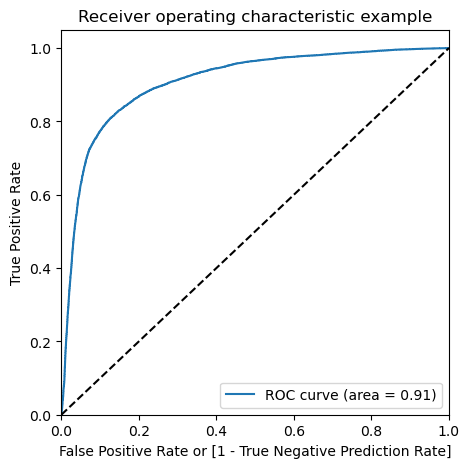

In [188]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [196]:
# FINDING OPTIMAL POINT
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.147708,0,0,0,0,0,0,0,0,0,0,0
1,0,0.387236,0,0,0,0,0,0,0,0,0,0,0
2,0,0.327065,0,0,0,0,0,0,0,0,0,0,0
3,0,0.370075,0,0,0,0,0,0,0,0,0,0,0
4,0,0.593352,1,1,1,1,1,1,1,1,1,1,1


In [198]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.147708,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.387236,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.327065,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.370075,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.593352,1,1,1,1,1,1,1,1,1,1,1,1


In [200]:
# PREDICTING
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
35865,0.178491,0.110441,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,...,0,0,0,1,0,0,1,0,0,0
41952,0.181306,0.132776,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,...,1,0,0,1,0,0,0,0,1,0
98938,0.216810,0.139406,0.061230,0.003275,0.037889,0.008157,0.010851,0.025458,0.018789,0.0,...,1,0,0,1,0,0,0,0,0,0
29459,0.188614,0.120851,0.042998,0.020180,0.000963,0.000297,0.001588,0.003828,0.000573,0.0,...,1,0,0,1,0,0,1,0,0,0
70682,0.187872,0.168702,0.098384,0.005699,0.011111,0.039505,0.084425,0.242612,0.135335,0.0,...,1,0,0,0,1,0,0,1,0,0


In [202]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_6,roam_og_mou_8,loc_og_t2m_mou_8,total_og_mou_8,loc_ic_t2m_mou_7,loc_ic_mou_8,std_ic_mou_6,total_ic_mou_8,spl_ic_mou_8,total_rech_num_7,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
35865,0.178491,0.000000,0.000000,0.000053,0.002280,0.002782,0.001572,0.011886,0.000000,0.050725,0.010204,0.000714,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
41952,0.181306,0.000000,0.005379,0.009067,0.011624,0.022029,0.019560,0.028095,0.000000,0.043478,0.020408,0.024643,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
98938,0.216810,0.000000,0.073716,0.024987,0.242001,0.183375,0.014948,0.168044,0.000000,0.079710,0.035714,0.040429,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
29459,0.188614,0.000000,0.000000,0.000800,0.000525,0.000037,0.000000,0.011214,0.000000,0.072464,0.025510,0.021143,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
70682,0.187872,0.031491,0.041749,0.157573,0.107505,0.066205,0.000918,0.061288,0.080257,0.108696,0.061224,0.088357,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [204]:
X_test_SM = sm.add_constant(X_test)

In [206]:
y_test_pred = res.predict(X_test_SM)

In [208]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.704100
41952,0.470718
98938,0.001102
29459,0.112300
70682,0.023616


In [210]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [212]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [214]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()


,churn,Conv_prob
35865,0,0.704100
41952,0,0.470718
98938,0,0.001102
29459,0,0.112300
70682,0,0.023616


In [216]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.704100,1
41952,0,0.470718,0
98938,0,0.001102,0
29459,0,0.112300,0
70682,0,0.023616,0


In [220]:
#OVERALL ACCUACY
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8336851460948783

In [222]:
#EVALUAION
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6918 1354]
 [ 143  586]]


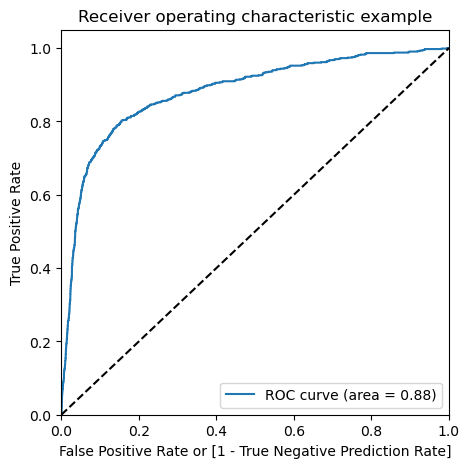

In [224]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

#### LOGISTIC REGRESION WITH PCA

In [229]:
# TEST TRAIN SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# SCALING

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 148)
Dimension of X_test: (9001, 148)
Dimension of X_train_sm Shape: (38576, 148)
Dimension of y_train_sm Shape: (38576,)


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.176515,0.117809,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,...,1,0,0,1,0,0,0,0,0,0
1,0.183226,0.121517,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,...,1,0,0,1,0,0,0,0,1,0
2,0.179991,0.128244,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,...,1,0,0,0,1,0,1,0,0,0
3,0.254664,0.201639,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,...,1,0,0,1,0,0,0,0,1,0
4,0.218173,0.135854,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,...,0,0,0,0,1,0,0,1,0,0


In [233]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train_sm)

PCA(random_state=42)

In [235]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 148)
Dimension of X_test_pca:  (9001, 148)


In [237]:
#PCA COMPONENTS
pca.components_

array([[ 3.49080261e-03,  6.03189973e-03,  1.79023034e-02, ...,
        -8.02260637e-02,  1.99443782e-01, -2.17072915e-04],
       [-1.13818324e-03, -4.88302528e-04,  1.13873803e-03, ...,
         6.62323173e-01, -7.18489464e-01,  1.95706257e-04],
       [-1.07185481e-02, -2.14027596e-03,  8.17289768e-03, ...,
         5.75318398e-02,  4.32733574e-02,  1.31485111e-03],
       ...,
       [-0.00000000e+00, -8.85400265e-17,  3.28808318e-17, ...,
        -5.35412846e-18,  6.52914508e-18,  6.13550901e-18],
       [ 0.00000000e+00, -3.30868956e-16, -3.63508437e-17, ...,
        -7.64921104e-18,  2.38811640e-18, -2.92632748e-17],
       [-3.65364819e-01, -4.99944924e-01,  1.29063427e-15, ...,
        -7.11236625e-17,  1.73472348e-18, -1.25767452e-17]])

In [241]:
#LOG REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [243]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6762 1510]
 [ 128  601]] 

Accuracy of the logistic regression model with PCA:  0.8180202199755583


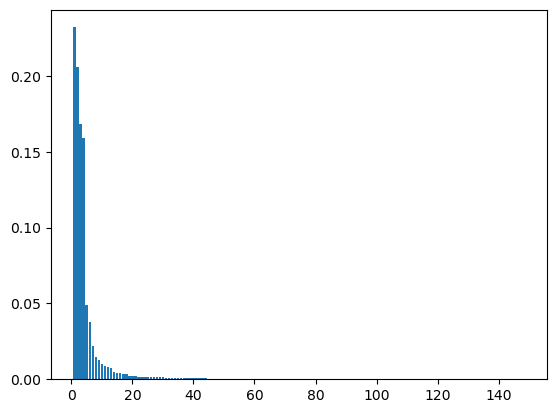

In [245]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()


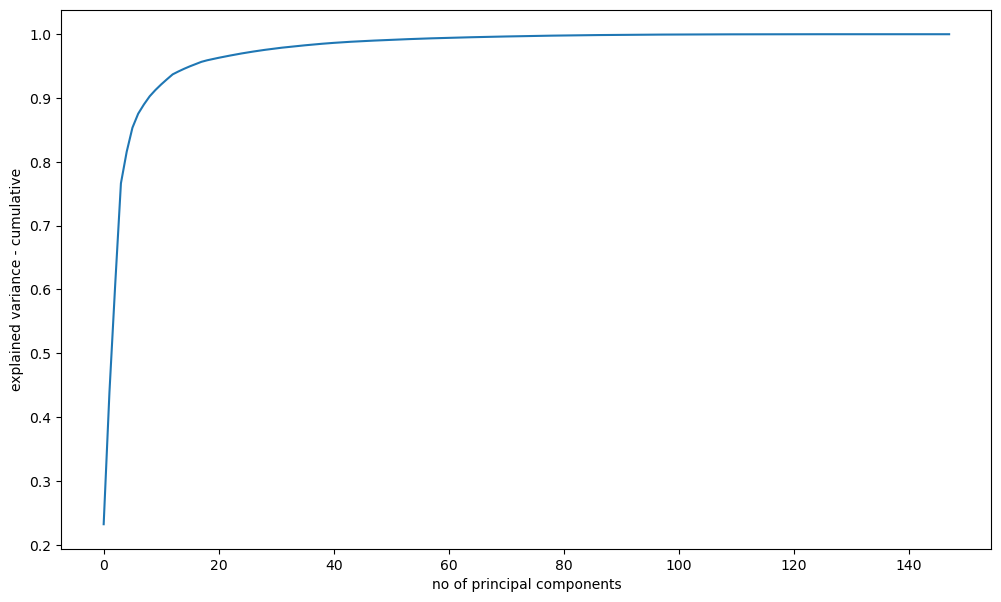

In [247]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

##### select the number of components as 15

In [250]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)


Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


In [254]:
#new log reg
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (9001, 1)


In [256]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[6302 1970]
 [ 187  542]] 

Accuracy of the logistic regression model with PCA:  0.760359960004444
